In [77]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

In [78]:
my_scores = pd.read_csv('./hyperparams/engineered_features.csv', index_col=0, header=[0]).T
paper_scores = pd.read_csv('./hyperparams/paper_scores.csv', index_col=0, header=[0]).T
my_scores

,Decision Tree,Random Forest,K-NN,MLP,SVM,LOF,IF
accuracy,99.49,99.55,99.65,99.63,99.67,97.86,99.54
precision,79.35,82.93,88.21,89.03,90.86,11.18,79.75
recall,76.63,78.00,80.80,77.94,79.54,11.83,81.49
f1,77.97,80.39,84.34,83.12,84.83,11.50,80.61
MCC,77.72,80.20,84.25,83.12,84.85,10.42,80.38
ROC-AUC,88.20,88.90,90.34,88.91,89.72,55.35,90.62
AUPR,61.08,64.94,71.50,69.66,72.51,2.36,65.21


In [79]:
# Mean Absolute Error with and without LOF
abs_diff = abs(paper_scores - my_scores)
abs_diff.mean().mean(), abs_diff[[col for col in abs_diff.columns if col != 'LOF']].mean().mean()

(14.60214285714286, 8.373380952380952)

<Axes: >

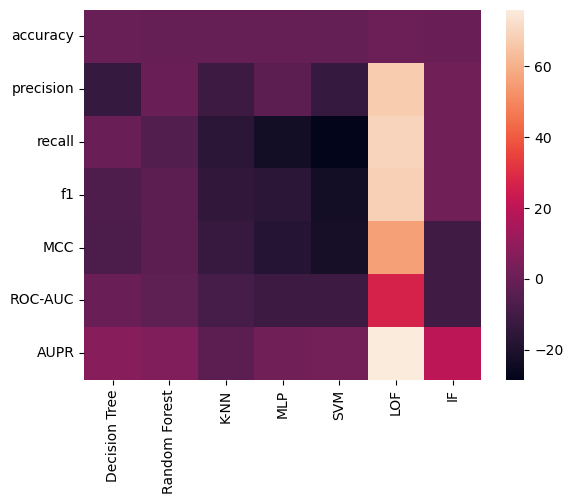

In [80]:
# Mean Error with and without LOF
diff = paper_scores - my_scores
sns.heatmap(diff)

In [81]:
my_scores['hue'] = 'My Scores'
paper_scores['hue'] = 'Paper Scores'

In [110]:
def plot_scores(first, second, title):
    df = pd.concat([first, second], axis = 0)
    
    fig, ax = plt.subplots(2, 4, figsize=(20, 10))

    sns.barplot(data=df, x=df.index, y='Decision Tree', hue='hue', ax=ax[0, 0])
    sns.barplot(data=df, x=df.index, y='Random Forest', hue='hue', ax=ax[0, 1])
    sns.barplot(data=df, x=df.index, y='K-NN', hue='hue', ax=ax[0, 2])
    sns.barplot(data=df, x=df.index, y='MLP', hue='hue', ax=ax[0, 3])
    sns.barplot(data=df, x=df.index, y='SVM', hue='hue', ax=ax[1, 0])
    sns.barplot(data=df, x=df.index, y='LOF', hue='hue', ax=ax[1, 1])
    sns.barplot(data=df, x=df.index, y='IF', hue='hue', ax=ax[1, 2])

    ax[0, 0].set_title('Decision Tree')
    ax[0, 1].set_title('Random Forest')
    ax[0, 2].set_title('K Nearest Neighbors')
    ax[0, 3].set_title('Multi-level Perceptron')
    ax[1, 0].set_title('Support Vector Machine')
    ax[1, 1].set_title('Local Outlier Factor')
    ax[1, 2].set_title('Isolation Forest')

    for i in range(0, 4):
        for j in range(0, 2):
            ax[j, i].set_ylabel('Score in %')
            ax[j, i].set_xticklabels(labels = first.index, rotation=30)
    fig.show()

/tmp/ipykernel_1073627/2456281264.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j, i].set_xticklabels(labels = first.index, rotation=30)


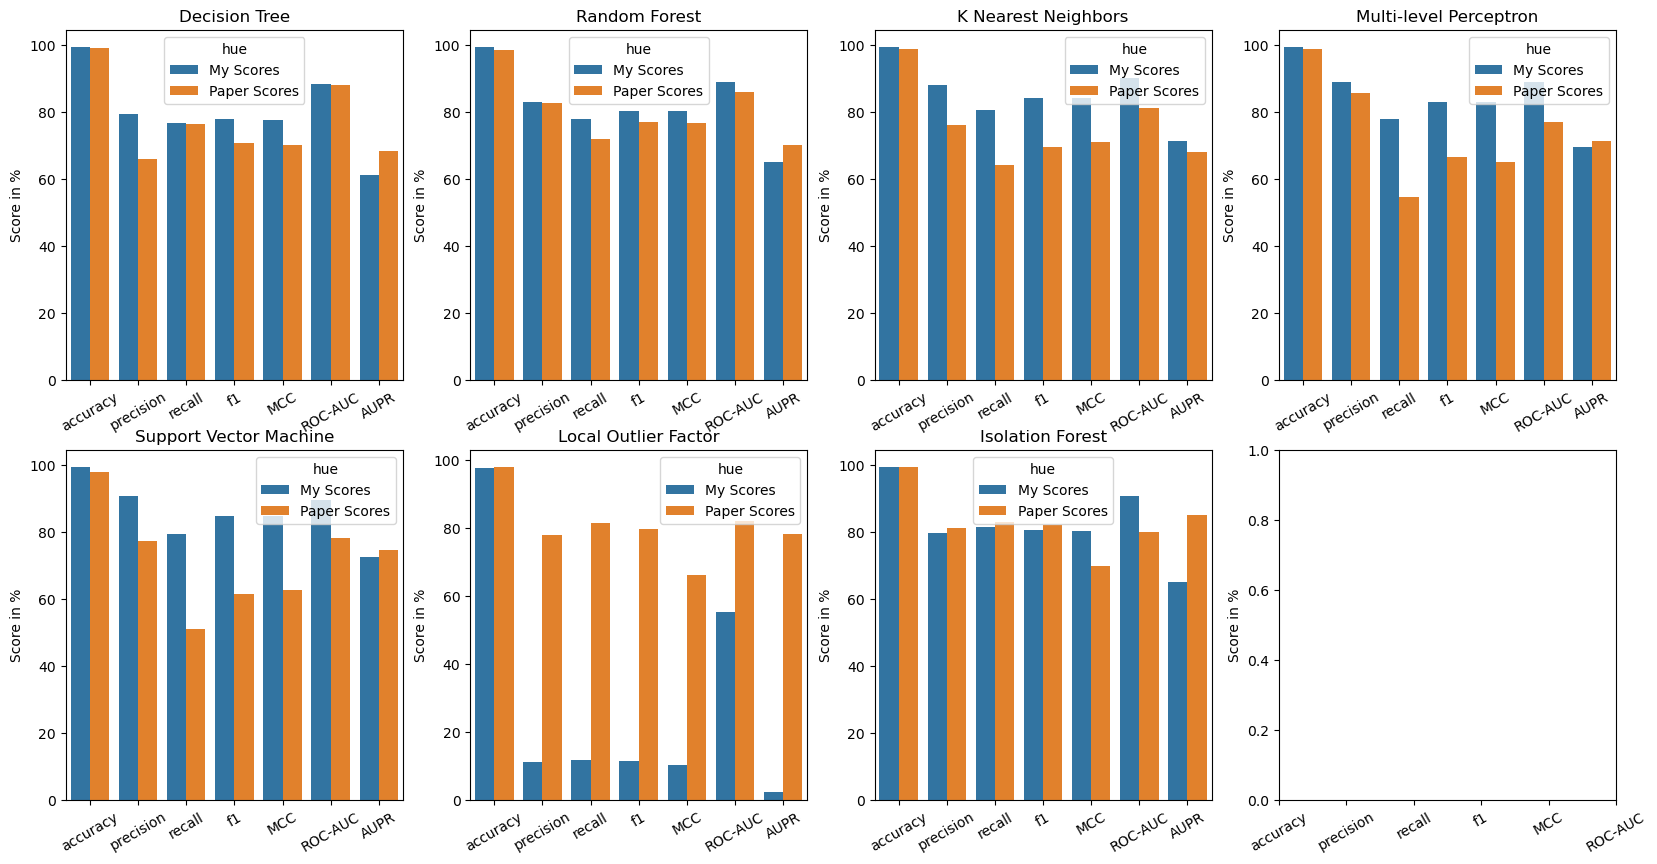

In [111]:
plot_scores(my_scores, paper_scores, 'My scores vs. Paper Scores no graph features')